**Proyek Akhir Bab: Meringkas Data Penjualan**

***Skenario: Manajer penjualan sangat terkesan dengan analisis Anda. Sekarang, dia meminta Anda untuk membuat laporan ringkasan (agregat) untuk mendapatkan gambaran besar tentang performa penjualan bulan lalu.***

----

**Tantangan**

**1. Statistik Penjualan Keseluruhan**

- Cetak statistik ringkasan dasar untuk kolom numerik utama: 'Harga Satuan', 'Jumlah Terjual', dan 'Total Pendapatan'.

    - Petunjuk: Gunakan metode .describe() pada DataFrame yang sudah dipilih kolomnya.

**2. Popularitas Produk**

- Hitung dan tampilkan produk mana yang paling sering muncul dalam transaksi (paling populer).

    - Petunjuk: Gunakan .value_counts() pada kolom 'Produk'.

**3. Ringkasan per Kategori (Menggunakan .groupby())**

- Manajer ingin membandingkan performa kategori 'Elektronik' dan 'Aksesoris'.

- Gunakan .groupby() untuk menghitung jumlah total (sum) dari 'Jumlah Terjual' dan 'Total Pendapatan' untuk setiap 'Kategori'.

**4. (Tantangan Ekstra) Laporan Penjualan Harian (Menggunakan .pivot_table())**

- Buat sebuah pivot table untuk melihat ringkasan penjualan harian.

- Jadikan 'Tanggal' sebagai index.

- Hitung jumlah (sum) dari 'Total Pendapatan' untuk setiap tanggal.

- Tampilkan pivot table tersebut.
[Gambar dari tabel pivot Pandas yang diringkas]

---

**Data yang Digunakan**

***menggunakan DataFrame df_penjualan yang sudah memiliki kolom 'Total Pendapatan'.***

In [16]:
import pandas as pd
import numpy as np

data_penjualan = {
    'Tanggal' : ['2024-07-01', '2024-07-01', '2024-07-02', '2024-07-03', '2024-07-03', '2024-07-04'],
    'Produk' : ['Laptop', 'Mouse', 'Laptop', 'Monitor', 'Keyboard', 'Mouse'],
    'Kategori': ['Elektronik', 'Aksesoris', 'Elektronik', 'Elektronik', 'Aksesoris', 'Aksesoris'],
    'Harga Satuan': [15000000, 150000, 15500000, 3500000, 750000, 160000],
    'Jumlah Terjual': [5, 10, 3, 7, 8, 12]
}
df_penjualan = pd.DataFrame(data_penjualan)
df_penjualan['Total Pendapatan'] = np.array(df_penjualan['Harga Satuan']) * np.array(df_penjualan['Jumlah Terjual'])
df_penjualan 

,Tanggal,Produk,Kategori,Harga Satuan,Jumlah Terjual,Total Pendapatan
0,2024-07-01,Laptop,Elektronik,15000000,5,75000000
1,2024-07-01,Mouse,Aksesoris,150000,10,1500000
2,2024-07-02,Laptop,Elektronik,15500000,3,46500000
3,2024-07-03,Monitor,Elektronik,3500000,7,24500000
4,2024-07-03,Keyboard,Aksesoris,750000,8,6000000
5,2024-07-04,Mouse,Aksesoris,160000,12,1920000


---

**1. Statistik Penjualan Keseluruhan**

In [17]:
summary_statistic = df_penjualan[['Harga Satuan', 'Jumlah Terjual', 'Total Pendapatan']].describe().round()
summary_statistic

,Harga Satuan,Jumlah Terjual,Total Pendapatan
count,6.0,6.0,6.0
mean,5843333.0,8.0,25903333.0
std,7392474.0,3.0,29676726.0
min,150000.0,3.0,1500000.0
25%,307500.0,6.0,2940000.0
50%,2125000.0,8.0,15250000.0
75%,12125000.0,10.0,41000000.0
max,15500000.0,12.0,75000000.0


---

**2. Popularitas Produk[[**

In [20]:
most_frequent_product = df_penjualan['Produk'].value_counts()
most_frequent_product


Produk
Laptop      2
Mouse       2
Monitor     1
Keyboard    1
Name: count, dtype: int64

----

**3. Ringkasan per Kategori (Menggunakan .groupby())**

In [31]:
versus = df_penjualan.groupby('Kategori')[['Jumlah Terjual', 'Total Pendapatan']].sum()
print(versus)


# import matplotlib.pyplot as plt
# versus.plot(kind='bar', figsize=(8,4))
# plt.title('Total Penjualan dan Pendapatan per Kategori')
# plt.xlabel('Kategori')
# plt.ylabel('Jumlah')
# plt.xticks(rotation=0)
# plt.legend(['Jumlah Terjual', 'Total Pendapatan'])

# plt.show() 




            Jumlah Terjual  Total Pendapatan
Kategori                                    
Aksesoris               30           9420000
Elektronik              15         146000000


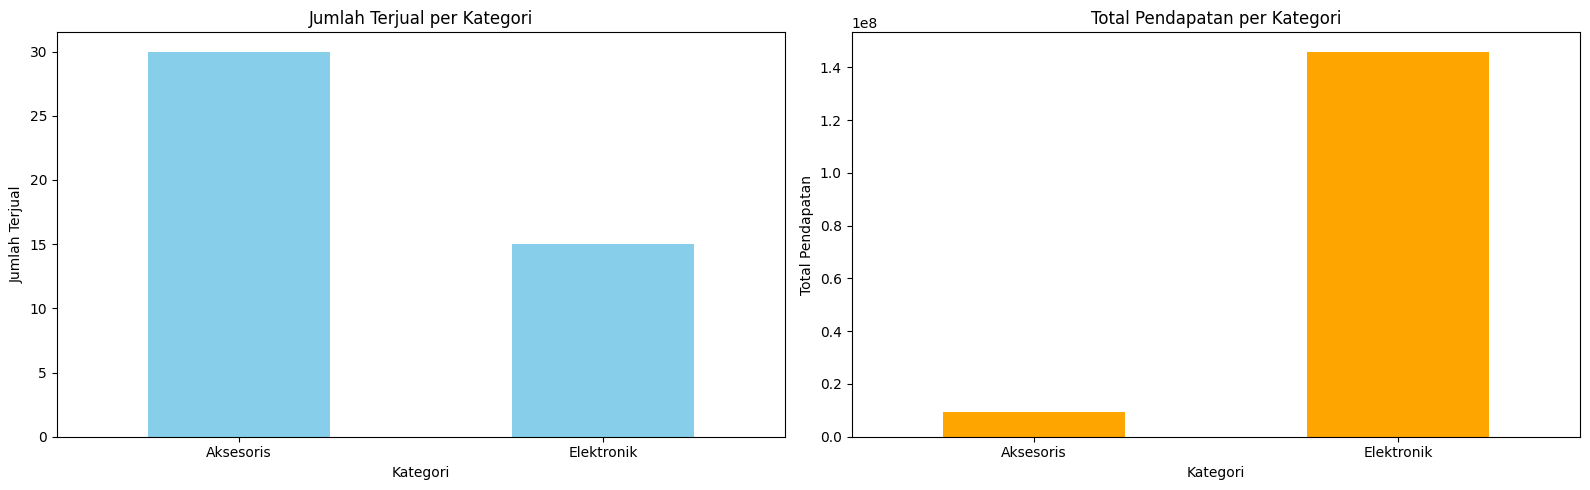

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 baris, 2 kolom subplot

# Subplot 1: Jumlah Terjual
versus['Jumlah Terjual'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Jumlah Terjual per Kategori')
axes[0].set_xlabel('Kategori')
axes[0].set_ylabel('Jumlah Terjual')
axes[0].set_xticklabels(versus.index, rotation=0)

# Subplot 2: Total Pendapatan
versus['Total Pendapatan'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Total Pendapatan per Kategori')
axes[1].set_xlabel('Kategori')
axes[1].set_ylabel('Total Pendapatan')
axes[1].set_xticklabels(versus.index, rotation=0)

plt.tight_layout()  # rapikan layout supaya gak saling tumpang tindih
plt.show()


---

**4. (Tantangan Ekstra) Laporan Penjualan Harian (Menggunakan .pivot_table())**

In [39]:
daily_report = df_penjualan.pivot_table(values='Total Pendapatan', index='Tanggal', aggfunc='sum')
daily_report


,Total Pendapatan
Tanggal,
2024-07-01,76500000
2024-07-02,46500000
2024-07-03,30500000
2024-07-04,1920000


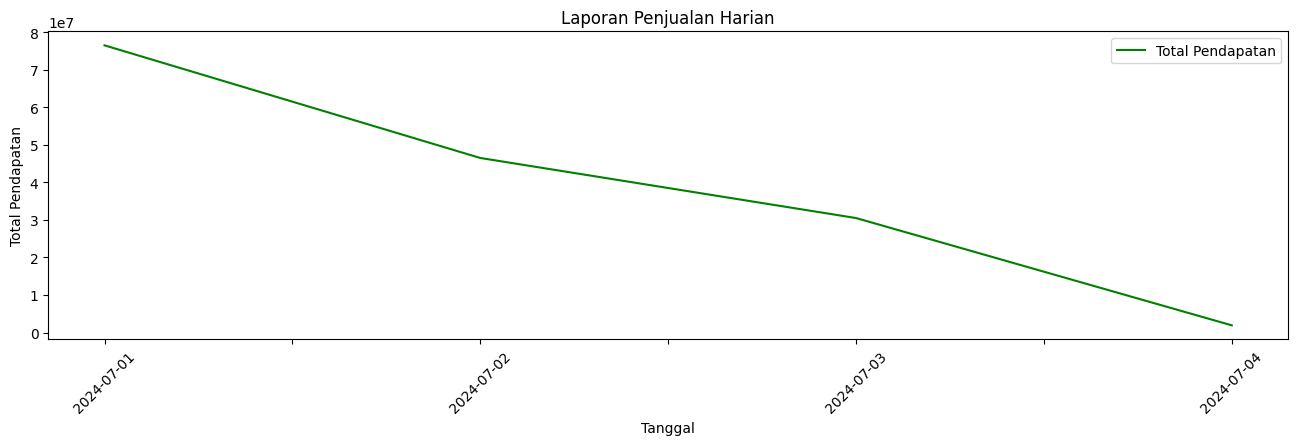

In [42]:
daily_report.plot(kind='line', figsize=(16,4), color='green')
plt.title('Laporan Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.show()